In [1]:
filename = '1665438245_600:1201:20_6:20_result.pickle'

In [2]:
import pickle
from matplotlib import pyplot
import numpy as np

a = pickle.load(open(filename, "rb")) 

In [3]:
bit_cutoff = 128

In [4]:
x = list(a.items())
x = sorted(x)
x, values = zip(*x)
colors = np.zeros(len(values))
colors[np.array(values) >= bit_cutoff] = 100
x, y = zip(*x)
mat = np.flip(np.array(values).reshape((len(set(x)), len(set(y)))).transpose(), axis=0)
binary_mat = mat >= bit_cutoff

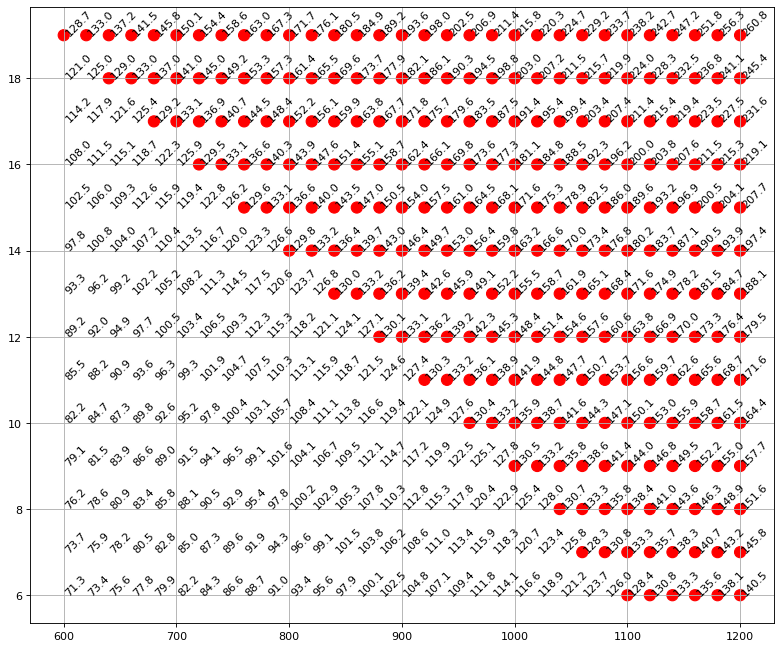

In [5]:
fig, ax = pyplot.subplots(figsize=(12, 10), dpi=80)
ax.scatter(x, y, s=colors, c='red')
ax.grid()

for i in range(len(values)):
    ax.annotate(round(values[i], 1), (x[i], y[i]), rotation=45)

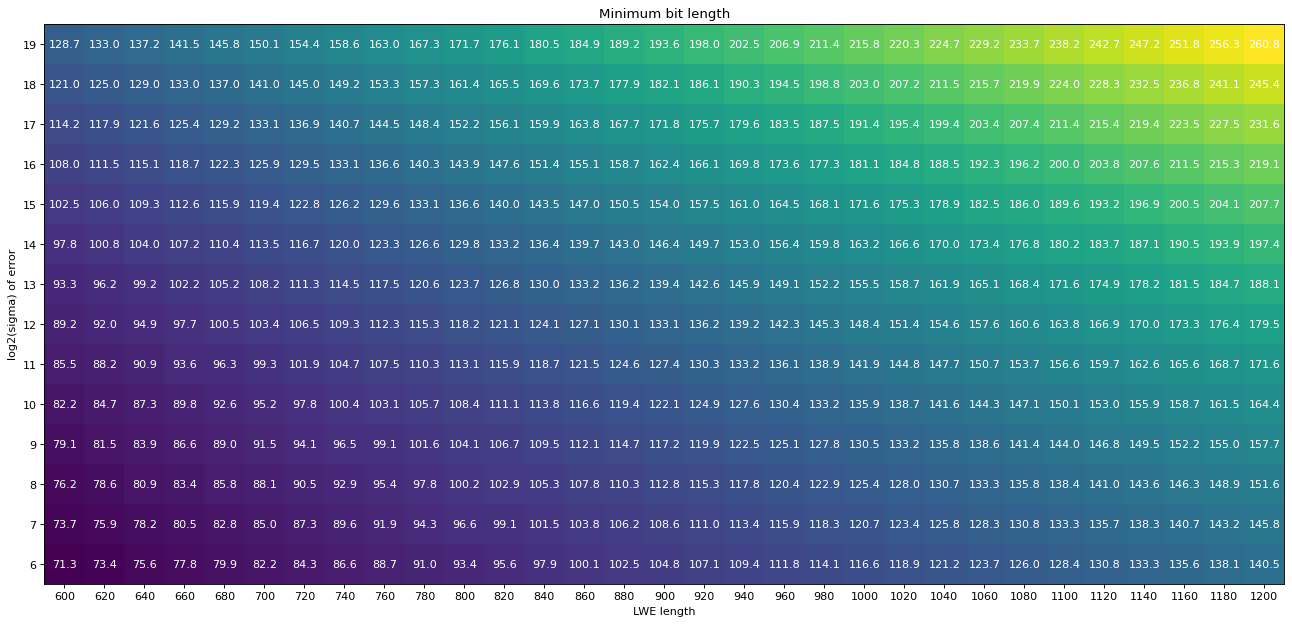

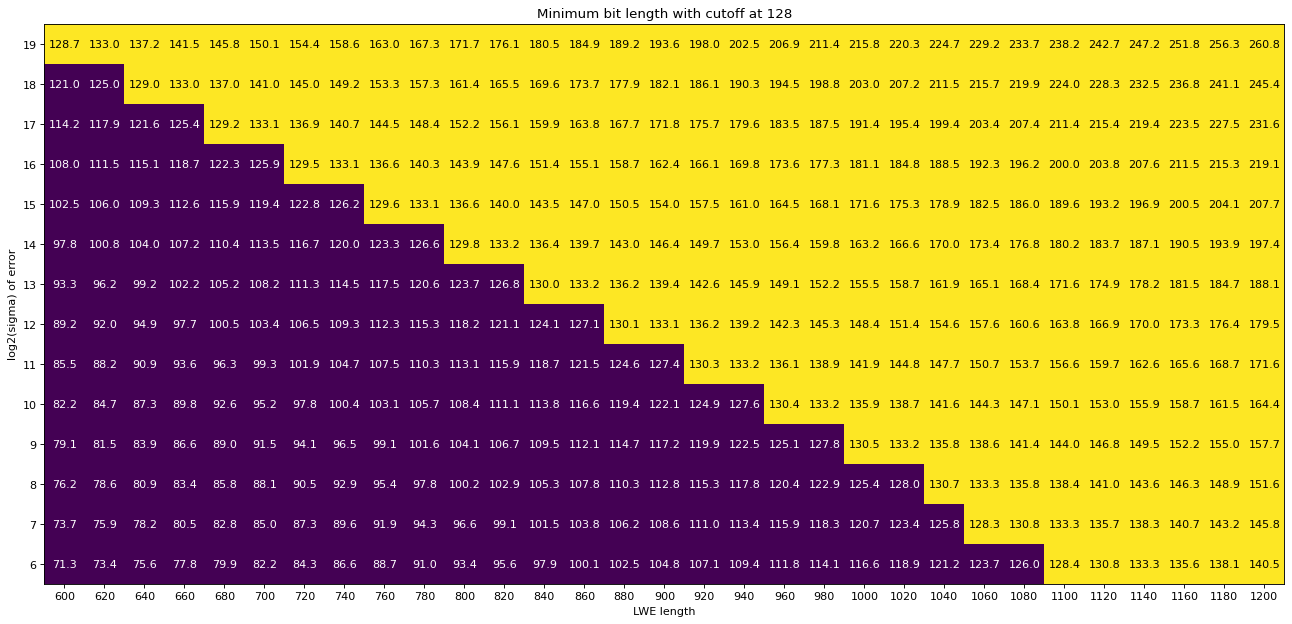

In [6]:
fig, ax = pyplot.subplots(figsize=(20, 20), dpi=80)

# ax.imshow(mat, extent=[min(x), max(x), min(y), max(y)])
# ax.set_aspect(max(x) / max(y)/2)
ax.imshow(mat)
ax.set_xticks(np.arange(0, len(set(x)), 1))
ax.set_yticks(np.arange(0, len(set(y)), 1))
ax.set_xticklabels(sorted(list(set(x))))
ax.set_yticklabels(sorted(list(set(y)), reverse=True))

pyplot.title('Minimum bit length')

fig2, ax2 = pyplot.subplots(figsize=(20, 20), dpi=80)

# ax.imshow(mat, extent=[min(x), max(x), min(y), max(y)])
# ax.set_aspect(max(x) / max(y)/2)
ax2.imshow(binary_mat)
ax2.set_xticks(np.arange(0, len(set(x)), 1))
ax2.set_yticks(np.arange(0, len(set(y)), 1))
ax2.set_xticklabels(sorted(list(set(x))))
ax2.set_yticklabels(sorted(list(set(y)), reverse=True))


for (j,i), label in np.ndenumerate(mat):
    ax.text(i,j, round(label, 1), ha='center', va='center', color='white')
    ax2.text(i,j, round(label, 1), ha='center', va='center', color='white' if label < bit_cutoff else 'black')

pyplot.title(f'Minimum bit length with cutoff at {bit_cutoff}')
    
ax.set_xlabel('LWE length')
ax2.set_xlabel('LWE length')

ax.set_ylabel('log2(sigma) of error')
ax2.set_ylabel('log2(sigma) of error')


pyplot.show()